In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scps

%matplotlib notebook
scatter_params = {'linestyle': 'none',
                  'marker': '^',
                  'markerfacecolor': 'none'}

<IPython.core.display.Javascript object>


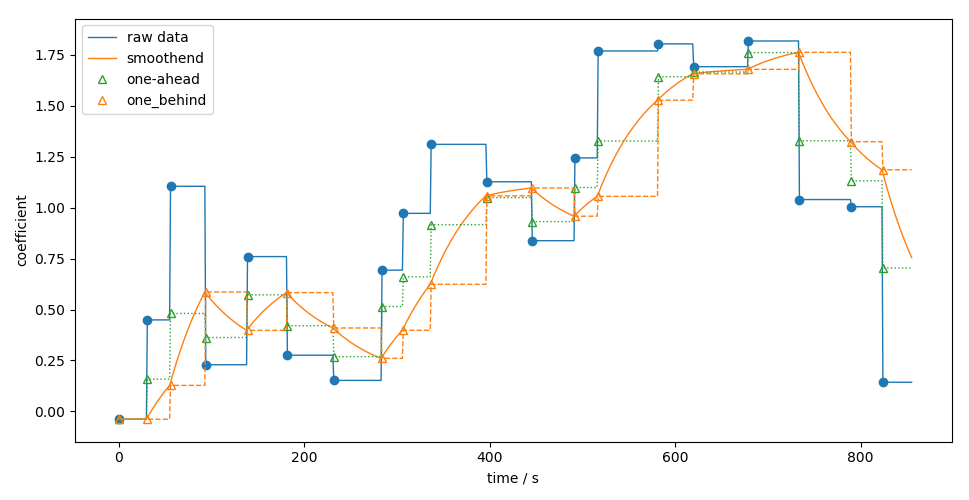

In [2]:
N = 20
delta_low, delta_high = 20, 71
step_low, step_high = -1, 1

y_raw = np.random.uniform(step_low, step_high, size=N).cumsum()
deltas = np.random.randint(delta_low, delta_high, size=N)
x_raw = np.append(0, deltas.cumsum())[:-1]
y_fine = np.repeat(y_raw, deltas)

fig, ax = plt.subplots(figsize=(9.7, 5))
_ = ax.plot(y_fine, linewidth=1.0, label='raw data')
_ = ax.scatter(x_raw, y_raw)
_ = ax.set(xlabel='time / s', ylabel='coefficient')
fig.tight_layout()

In [3]:
decay = 60

s_fine = np.zeros_like(y_fine)
s_fine[0] = y_fine.copy()[0]

damp_fine = 1.0 - np.exp(-1/decay)

for t in range(1, len(y_fine)):
    s_fine[t] = damp_fine * y_fine[t] + (1.0 - damp_fine) * s_fine[t-1]

s_fine_artist, = ax.plot(s_fine, linewidth=1.0, label='smoothend')

In [4]:
s_ahead = np.zeros_like(y_raw)
s_ahead[0] = y_raw.copy()[0]
s_behind = np.zeros_like(y_raw)
s_behind[0] = y_raw.copy()[0]

for t in range(1, len(y_raw)):
    delta = x_raw[t] - x_raw[t-1]
    damp_raw = 1.0 - np.exp(-delta/decay)
    s_ahead[t] = damp_raw * y_raw[t] + (1.0 - damp_raw) * s_ahead[t-1]
    s_behind[t] = damp_raw * y_raw[t-1] + (1.0 - damp_raw) * s_behind[t-1]

s_ahead_rect = np.repeat(s_ahead, deltas)
s_ahead_artist, = ax.plot(x_raw, s_ahead, **scatter_params, label='one-ahead')
_ = ax.plot(s_ahead_rect, linestyle=':', linewidth=1.0, color=s_ahead_artist.get_color())
s_behind_rect = np.repeat(s_behind, deltas)
s_behind_artist, = ax.plot(x_raw, s_behind, **scatter_params, color=s_fine_artist.get_color(), label='one_behind')
_ = ax.plot(s_behind_rect, linestyle='--', linewidth=1.0, color=s_behind_artist.get_color())
_ = ax.legend()

<IPython.core.display.Javascript object>


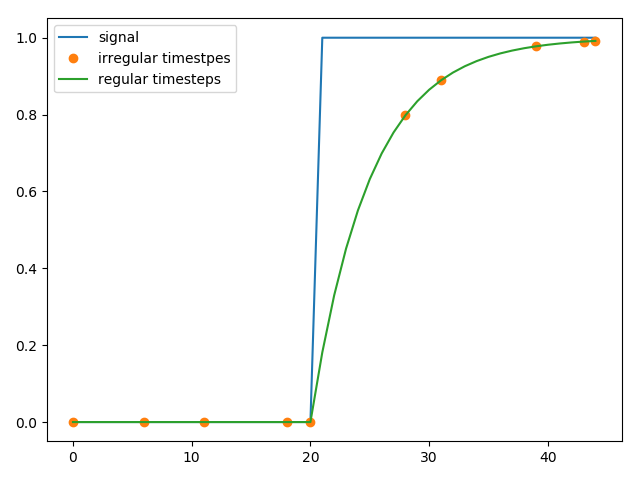

In [27]:
tau = 5

y_rand = np.array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])
d = np.random.randint(1, 9, 10)
x_rand = np.append(0, d.cumsum())[:-1]
s_rand = np.zeros_like(y)
s_rand[0] = y_rand.copy()[0]
y_cont = np.append(np.zeros(x_rand[4]+1), np.ones(x_rand[-1] - x_rand[4]))
s_cont = np.zeros_like(y_cont)
s_cont[0] = y_cont.copy()[0]

for t in range(1, len(y_rand)):
    delta = x_rand[t] - x_rand[t-1]
    damp = 1 - np.exp(-delta/tau)
    s_rand[t] = damp * y_rand[t] + (1.0 - damp) * s_rand[t-1]
    
for t in range(1, len(y_cont)):
    damp = 1 - np.exp(-1/tau)
    s_cont[t] = damp * y_cont[t] + (1.0 - damp) * s_cont[t-1]
    
fig, ax = plt.subplots()
_ = ax.plot(y_cont, label='signal')
_ = ax.plot(x_rand, s_rand, marker='o', linestyle='none', label='irregular timestpes')
_ = ax.plot(s_cont, label='regular timesteps')
_ = ax.legend()
fig.tight_layout()

## Fart around

In [ ]:
damping = 0.5

ds = np.zeros_like(s)
ds[0] = s[0]

for t in range(1, len(s)):
    ds[t] = damping * s[t] + (1 - damping) * ds[t-1]

smooth_ds, = ax.plot(ds)

In [ ]:
damping = 0.2

ds = dds = np.zeros_like(s)
ds[0] = dds[0] = s[0]

for t in range(1, len(s)):
    ds[t] = damping * s[t] + (1 - damping) * ds[t-1]
    dds[t] = damping * ds[t] + (1 - damping) * dds[t-1]

smooth_ds, = ax.plot(dds)

In [ ]:
s = b = np.zeros_like(y_fine)
s[0] = y_fine[0]
b[0] = y_fine[1] - y_fine[0]

for t in range (2, len(y_fine)):
    s[t] = 0.1*y_fine[t] + 0.9*(s[t-1] + b[t-1])
    b[t] = 0.5*(s[t] - s[t-1]) + 0.5*b[t-1]
    
smooth_2a, = ax.plot(s)

In [ ]:
damping = 0.25

s = sp = spp = np.zeros_like(y_fine)
sp[0] = y_fine[0]
spp[0] = y_fine[0]

for t in range (1, len(y_fine)):
    sp[t] =  damping * y_fine[t] + (1 - damping) * sp[t-1]
    spp[t] = damping * sp[t] + (1 - damping) * spp[t-1]
    s[t] = 2*sp[t] - spp[t]
    
smooth_2b, = ax.plot(s)

In [ ]:
s = np.zeros_like(y_fine)
s[0] = y_fine[0]
s[1] = y_fine[1]

for t in range(2, len(y_fine)):
    s[t] = 0.25*y_fine[t] + 0.5*y_fine[t-1] + 0.25*y_fine[t-2]

smooth_3, = ax.plot(s)

\begin{align}
s_2 & = \frac{1}{4}x_2 + \frac{1}{2}x_1 + \frac{1}{4}x_0 \\
s_3 & = \frac{1}{4}x_3 + \frac{1}{2}x_2 + \frac{1}{4}x_1 = \frac{1}{4}x_3 + 2s_2
\end{align}

In [ ]:
x_grid = np.linspace(0, 10, 101)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_grid, 1-(1+x_grid)*np.exp(-x_grid))